# แบบฝึกหัด 3

---

In [31]:
import numpy as np
import pandas as pd
import statistics

###  

3.1 บริษัทให้บริการด้าน IT ครบวงจรแห่งหนึ่งได้เก็บรวบรวมข้อมูลค่าซ่อมบำรุงอุปกรณ์คอมพิวเตอร์แม่ข่ายและจำนวนลูกค้าของบริษัทในปีที่ผ่านมาเป็นดังไฟล์ asm3_1_itcost.csv  
จงแสดงวิธีหาค่ามัธยฐานและฐานนิยมของค่าซ่อมบำรุงอุปกรณ์คอมพิวเตอร์แม่ข่าย

In [32]:
df_it = pd.read_csv('https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/asm3_1_itcost.csv')
df_it

,maintenance_cost,num_customer
0,<=5000,33
1,5001-10000,41
2,10001-15000,20
3,15001-20000,17
4,20001-25000,10
5,25001-30000,16
6,>=30001,5


เพิ่มคอลัมน์ความถี่สะสม:

In [33]:
df_it['cumu_num_customer'] = df_it.num_customer.cumsum()
df_it

,maintenance_cost,num_customer,cumu_num_customer
0,<=5000,33,33
1,5001-10000,41,74
2,10001-15000,20,94
3,15001-20000,17,111
4,20001-25000,10,121
5,25001-30000,16,137
6,>=30001,5,142


หาตำแหน่งของมัธยฐาน:

In [34]:
df_it.num_customer.sum()/2

71.0

ดังนั้น มัธยฐานอยู่ index ชั้น 1 ขอบเขตล่าง 5000.5  
แทนค่าในสูตรการหาค่ามัฐยฐาน:


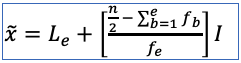

In [35]:
5000.5+( (71-33) / 41)*5000

9634.646341463415

หาค่าฐานนิยม:  
ฐานนิยมอยู่ที่ index ชั้น 1 แทนค่าในสูตรการหาค่าฐานนิยม:

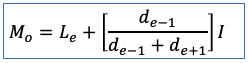

In [36]:
5000.5+( (41-33) / ((41-33) + (41-20)))*5000

6379.810344827586

###  

3.2 สุ่มตัวอย่างนักศึกษามาจำนวนหนึ่ง พบว่าคะแนนสอบวิชาสถิติ เป็นดังตาราง 'ex3_2_score.csv' จงหาค่า

**3.2.1 ค่าเฉลี่ย**

In [37]:
df_score = pd.read_csv('https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/asm3_2_score.csv')
df_score

,score,num_student
0,11-15,15
1,16-20,14
2,21-25,20
3,26-30,18
4,31-35,16
5,36-40,17


split string คอลัมน์ score เพื่อใช้สำหรับหาค่ากึ่งกลาง:

In [38]:
df_score[['sc_from', 'sc_to']] = df_score.score.str.split('-', expand=True).astype(int)
df_score

,score,num_student,sc_from,sc_to
0,11-15,15,11,15
1,16-20,14,16,20
2,21-25,20,21,25
3,26-30,18,26,30
4,31-35,16,31,35
5,36-40,17,36,40


หาค่ากึ่งกลางและเก็บไว้ที่คอลัมน์ x:

In [39]:
df_score['x'] = (df_score.sc_from + df_score.sc_to)/2
df_score

,score,num_student,sc_from,sc_to,x
0,11-15,15,11,15,13.0
1,16-20,14,16,20,18.0
2,21-25,20,21,25,23.0
3,26-30,18,26,30,28.0
4,31-35,16,31,35,33.0
5,36-40,17,36,40,38.0


หาค่าความถี่(f) คูณด้วยค่ากึ่งกลาง(x) เก็บผลไว้ที่คอลัมน์ fx:

In [40]:
df_score['fx'] = df_score.num_student*df_score.x
df_score

,score,num_student,sc_from,sc_to,x,fx
0,11-15,15,11,15,13.0,195.0
1,16-20,14,16,20,18.0,252.0
2,21-25,20,21,25,23.0,460.0
3,26-30,18,26,30,28.0,504.0
4,31-35,16,31,35,33.0,528.0
5,36-40,17,36,40,38.0,646.0


หาค่าเฉลี่ยโดยแทนค่าตามสูตร:  
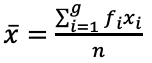

In [41]:
x_bar = df_score.fx.sum()/df_score.num_student.sum()
x_bar

25.85

**3.2.2 ค่ามัธยฐาน**

สร้างคอลัมน์ความถี่สะสม

In [42]:
df_score['f_cumu'] = df_score.num_student.cumsum()
df_score

,score,num_student,sc_from,sc_to,x,fx,f_cumu
0,11-15,15,11,15,13.0,195.0,15
1,16-20,14,16,20,18.0,252.0,29
2,21-25,20,21,25,23.0,460.0,49
3,26-30,18,26,30,28.0,504.0,67
4,31-35,16,31,35,33.0,528.0,83
5,36-40,17,36,40,38.0,646.0,100


หาตำแหน่งมัธยฐาน

In [43]:
df_score.num_student.sum()/2

50.0

ดังนั้นอยู่ที่ชั้น e=3 ซึ่งมีขอบเขตล่าง 25.5  
แทนค่าต่างๆ ตามสูตร  
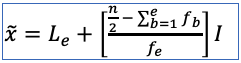

In [44]:
25.5+((50-49) / 18 )*5

25.77777777777778

**3.2.3 ค่าฐานนิยม**

ช่วงคะแนนที่มีฐานนิยมก็คือ 21-25 ชั้น e=2 แทนค่าตามสูตร  
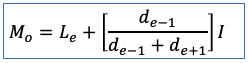

In [45]:
20.5+( (20-14)/((20-14)+(20-18)) )*5

24.25

**3.2.4 Q<sub>1</sub> และ Q<sub>3</sub>**

หาตำแหน่ง Q<sub>1</sub> และ Q<sub>3</sub>:

In [46]:
Q1_position = df_score.num_student.sum()*1/4
Q1_position

25.0

ตำแหน่ง Q<sub>1</sub> จะอยู่ที่ชั้น e=1

In [47]:
Q3_position = df_score.num_student.sum()*3/4
Q3_position

75.0

ตำแหน่ง Q<sub>3</sub> จะอยู่ที่ชั้น e=4

แทนค่าในสูตร  
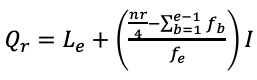

In [48]:
Q1 = 15.5+(Q1_position-15)/14*5
Q1

19.071428571428573

In [49]:
Q3 = 30.5+(Q3_position-67)/16*5
Q3

33.0

**3.2.5 D<sub>7</sub>**

หาตำแหน่ง D<sub>7</sub>

In [50]:
D7_position = df_score.num_student.sum()*7/10
D7_position

70.0

ตำแหน่ง D<sub>7</sub> จะอยู่ที่ชั้น e=4

แทนค่าในสูตร  
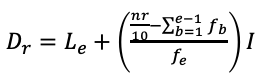

In [51]:
D7 = 30.5+(D7_position-67)/16*5
D7

31.4375

**3.2.6 P<sub>75</sub>**

P<sub>75</sub> คือ Q<sub>3</sub> ซึ่งมีค่า 33.0

**3.2.7 พิสัย**

In [52]:
40.5-10.5

30.0

**3.2.8 ส่วนเบี่ยงเบนควอร์ไทล์**

จากสูตร  
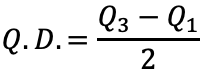  
แทนค่าในสูตร:

In [53]:
(Q3-Q1)/2

6.9642857142857135

**3.2.9 ส่วนเบี่ยงเบนมาตราฐานและความแปรปรวน**

จากสูตร  
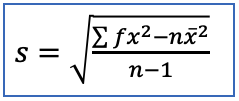

หาค่า Σfx<sup>2</sup>

In [54]:
fx2 = sum(df_score.num_student*df_score.x**2)
fx2

73735.0

แทนค่าในสูตร

In [55]:
s = np.sqrt((fx2-df_score.num_student.sum()*x_bar**2) / (df_score.num_student.sum()-1))
s

8.356180800805918

เนื่องจากความแปรปรวนคือ s<sup>2</sup> ดังนั้นจะได้ว่า

In [56]:
s**2

69.82575757575744

**3.2.10 สัมประสิทธิ์ของการแปรผัน**

จากสูตร  
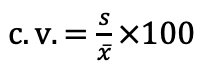  
แทนค่าในสูตร

In [57]:
s/x_bar*100

32.32565106694746

สัมประสิทธิ์ของการแปรผันมีค่า 32.33%

3.3 บริษัทเกมแห่งหนึ่งได้ทำการทดสอบ game engine รุ่นใหม่ ในคอมพิวเตอร์ที่มีส่วนประกอบของฮารด์แวร์ต่างๆกัน (เช่น cpu, gpu, ram, ฯลฯ) จำนวน 30 เครื่อง และทำการวัดค่า frames per second (FPS) ได้ผลดังนี้  
60.0, 30.2, 33.4, 59.9, 40.1, 25.5, 17.4, 28.6, 45.5, 57.8,  
22.5, 50.2, 30.8, 43.1, 50.5, 35.5, 27.4, 29.2, 55.5, 10.2,   
32.2, 27.8, 33.8, 53.4, 25.5, 30.4, 36.1, 49.3, 18.6, 50.0   
จงคำนวณหาค่าเฉลี่ย, ส่วนเบี่ยงเบนมาตราฐาน, ฐานนิยม, Q<sub>1</sub>, D<sub>3</sub>, P<sub>45</sub> ของค่า FPS ที่ได้จากการทดสอบ

ค่าเฉลี่ย:

In [58]:
fps = [60.0, 30.2, 33.4, 59.9, 40.1, 25.5, 17.4, 28.6, 45.5, 57.8,
22.5, 50.2, 30.8, 43.1, 50.5, 35.5, 27.4, 29.2, 55.5, 10.2,
32.2, 27.8, 33.8, 53.4, 25.5, 30.4, 36.1, 49.3, 18.6, 50.0 ]
np.mean(fps)

37.01333333333333

ส่วนเบี่ยงเบนมาตราฐาน:

In [59]:
np.std(fps)

13.284771565802536

ฐานนิยม:

In [60]:
statistics.multimode(fps)

[25.5]

Q<sub>1</sub>, D<sub>3</sub> และ P<sub>45</sub>  
Q<sub>1</sub> คือ P<sub>25</sub>  
D<sub>3</sub> คือ P<sub>30</sub>  

In [61]:
Q1 = np.percentile(fps, 25)
Q1

28.0

In [62]:
D3 = np.percentile(fps, 30)
D3

29.02

In [63]:
P45 = np.percentile(fps, 45)
P45

32.260000000000005

###   

3.4 หน่วยงานวิจัยแห่งหนึ่งได้รับมอบหมายจากทางรัฐบาลให้ทำการเปรียบเทียบระบบที่ใช้ในการผลิตพลังงานกระแสไฟฟ้าสำหรับนิคมอุตสาหกรรมแห่งหนึ่ง ระบบแรกมีกำลังการผลิตสูงสุด 10,000 เมกะวัตต์ โดยมีค่าเฉลี่ยและส่วนเบี่ยงเบนมาตราฐานของกำลังการผลิตอยู่ที่ 9,000±320 เมกะวัตต์ ระบบที่สองมีกำลังการผลิตสูงสุด 15,000 เมกะวัตต์ โดยมีค่าเฉลี่ยและส่วนเบี่ยงเบนมาตราฐานของกำลังการผลิตอยู่ที่ 14,000±900 เมกะวัตต์ จากข้อมูลนี้ทางสถาบันวิจัยจะสามารถสรุปว่าระบบใดมีกำลังการผลิตที่เที่ยงตรงกว่า



หาค่าสัมประสิทธิ์ของการแปรผัน จากสูตร  
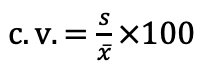  

ระบบแรก

In [64]:
cv1 = 320/9000*100
cv1

3.5555555555555554

ระบบที่สอง

In [65]:
cv2 = 900/14000*100
cv2

6.428571428571428

จากค่า cv ที่ได้ โรงงานแรกจะผลิตกระแสไฟฟ้าได้เที่ยงตรงกว่า